In [108]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def extract_positions_from_log(file_path, field):
    positions = []

    # Regex to match the [POS] line and extract x, y, z as floats
    pattern = re.compile(rf"\[{field}\]\[([-\d.eE]+)d,([-\d.eE]+)d,([-\d.eE]+)d\]")

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                x, y, z = map(float, match.groups())
                positions.append((x, y, z))
    return np.array(positions)

In [110]:
positions = extract_positions_from_log("../data/movements/kb0.log", "xyz")
velocities = extract_positions_from_log("../data/movements/kb0.log", "vel")

y = positions[:, 1]

diffs = np.diff(positions, axis=0)

vy = diffs[:, 1]
vh = np.linalg.norm(diffs[:, [0, 2]], axis=1)

vvy = velocities[:, 1]
vvh = np.linalg.norm(velocities[:, [0, 2]], axis=1)

print(vh)

print(np.mean(vh), np.mean(vvh))

[0.         0.         0.         0.         0.         0.39933355
 0.36339354 0.33068813 0.30092621 0.27384286 0.24919701 0.22676928
 0.20636006 0.18778766 0.17088677 0.15550697 0.14151134 0.12877533
 0.11718555 0.10663885 0.09704136 0.08830764 0.08035995 0.07312756
 0.06654608 0.06055694 0.05510681 0.05005988 0.04555449 0.04145459
 0.03772368 0.03432855 0.03123898 0.02842747 0.025869   0.02354079
 0.02142212 0.01949413 0.01773966 0.01614309 0.01469021 0.01336809
 0.01216497 0.01107012 0.01007381 0.00916717 0.00834212 0.00759133
 0.00690811 0.00628638 0.00572061 0.00520575 0.00473724 0.00431088
 0.0039229  0.00356984 0.00324856 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
0.05573701267947038 0.05507834386634207


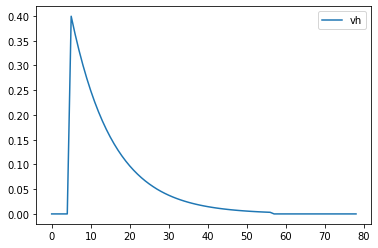

In [111]:
plt.plot(np.arange(len(vh)), vh, label="vh")
plt.legend()

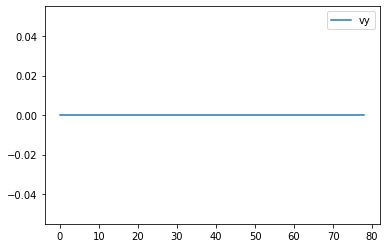

In [112]:
plt.plot(np.arange(len(vy)), vy, label="vy")
plt.legend()

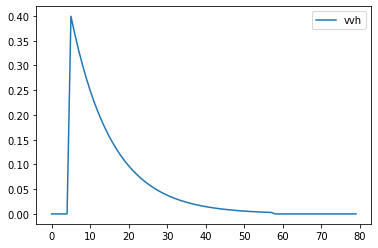

In [113]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh")
plt.legend()

0.0


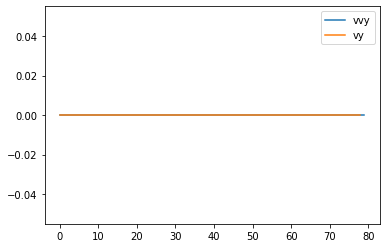

In [115]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vy)), vy, label="vy")

plt.legend()
print(np.mean(vvy))

In [128]:
# simulate knockback

g_ground = 0.0784
g_up = 0.0828
g_down = 0.075


jump_strength = 0.42 + g_up

sprint_speed = 0.28

air_fric_rel = 0.0375
jump_boost = 0.19
air_fric = 0.3

knockup = 0.434
knockback = 0.4

sim_y = y[0] + 60
sim_vy = vvy[0]
sim_vx = vh[0]
sim_vvx = vvh[0]

ys = [sim_y]
vys = [sim_vy]
vxs = [sim_vx]
vvxs = [sim_vvx]

for t in range(1, len(vvy)):
    
    sim_y = np.maximum(sim_y + sim_vy, 0)
    sim_vvx -= air_fric * (np.abs(sim_vvx)) * 0.3
    
    if t > 0 and vvh[t-1] < vvh[t]: # one frame after jump input
        sim_vy = knockup
        sim_vvx += knockback

    if sim_vy > 0:
        g = g_up
    else:
        g = g_down
        
    sim_vy -= g
    
    
    if sim_y == 0 and vvy[t] < 0.35:
        sim_vy = -g_down

    
    sim_vvx = np.maximum(sim_vvx, 0)
    
    print(sim_vvx)
    
    # if sprinting
    # np.maximum(sim_vx, sprint_speed)

    
    ys.append(sim_y)
    vys.append(sim_vy)
    
    vxs.append(sim_vx)
    vvxs.append(sim_vvx)
    

0.0
0.0
0.0
0.0
0.4
0.36400000000000005
0.33124000000000003
0.30142840000000004
0.274299844
0.24961285804000002
0.2271477008164
0.206704407742924
0.18810101104606086
0.1711719200519154
0.155766447247243
0.14174746699499113
0.12899019496544192
0.11738107741855215
0.10681678045088246
0.09720327021030303
0.08845497589137576
0.08049402806115194
0.07324956553564826
0.06665710463743992
0.060657965220070324
0.055198748350264
0.05023086099874024
0.04571008350885362
0.04159617599305679
0.03785252015368168
0.03444579333985033
0.031345671939263804
0.028524561464730064
0.02595735093290436
0.023621189348942966
0.0214952823075381
0.01956070689985967
0.0178002432788723
0.016198221383773793
0.014740381459234151
0.013413747127903077
0.012206509886391801
0.01110792399661654
0.010108210836921051
0.009198471861598157
0.008370609394054323
0.007617254548589434
0.006931701639216385
0.00630784849168691
0.005740142127435089
0.005223529335965931
0.004753411695728997
0.0043256046431133875
0.003936300225233183
0.

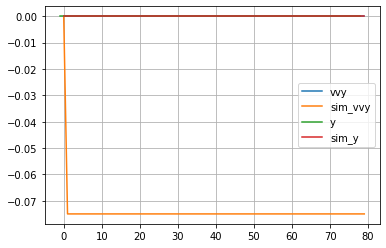

In [129]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vys)), vys, label="sim_vvy")
plt.plot(np.arange(len(y))-1, y+60, label="y")
plt.plot(np.arange(len(ys)), ys, label="sim_y")

plt.grid()

plt.legend()


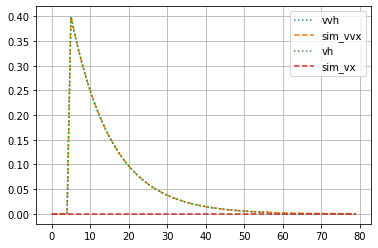

In [130]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh", linestyle=":")
plt.plot(np.arange(len(vvxs)), vvxs, label="sim_vvx", linestyle="--")
plt.plot(np.arange(len(vh)), vh, label="vh", linestyle=":")
plt.plot(np.arange(len(vxs)), vxs, label="sim_vx", linestyle="--")

plt.grid()

plt.legend()